In [13]:

import pandas as pd 
import pyodbc
import warnings
warnings.simplefilter('ignore')
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [4]:
DB = {'servername': 'LAPTOP-3S422SS6\\SQLEXPRESS', 'database': 'DAD'}

conn_str = (
    'DRIVER={SQL Server};'
    'SERVER=' + DB['servername'] + ';'
    'DATABASE=' + DB['database'] + ';'
    'Trusted_Connection=yes;'
)

conn = pyodbc.connect(conn_str)

query = "SELECT * FROM ORDERR"
order = pd.read_sql_query(query, conn)

conn.close()

In [26]:
order['DATE_Order_date'] = pd.to_datetime(order['DATE_Order_date'])
order['Year'] = order['DATE_Order_date'].dt.year
order['Month'] = order['DATE_Order_date'].dt.month
order['Day'] = order['DATE_Order_date'].dt.day
order = order.drop('DATE_Order_date', axis=1) 

KeyError: 'DATE_Order_date'

In [40]:
conn = pyodbc.connect(conn_str)

query = "SELECT * FROM PRODUCT"
product = pd.read_sql_query(query, conn)

conn.close()

In [43]:
conn = pyodbc.connect(conn_str)

query = "SELECT * FROM RETALER_SITE"
retailer = pd.read_sql_query(query, conn)

conn.close()

In [ ]:
order = pd.merge(order, product, left_on='PRODUCT_number', right_on='PRODUCT_id')

In [44]:
order = pd.merge(order, retailer, left_on='RETAILER_SITE_id', right_on='RETALER_SITE_id')

In [45]:
order

,ORDER_number_id,ORDER_detail_id,ORDER_Quantity,ORDER_unit_Cost,ORDER_Unit_price,ORDER_Unit_sale_price,Totale_omzet,ORDER_gross_profit,ORDER_profit_margin,ORDER_profit_per_product,...,RETALER_SITE_ACTIVE_INDICATOR_nr,RETALER_SITE_RETAILER_name,RETALER_SITE_RETAILER_TYPE_name,RETALER_SITE_SEGMENT_name,RETALER_SITE_CITY_name,RETALER_SITE_REGION_name,RETALER_SITE_COUNTRYname,RETALER_SITE_TERRITORY_name,SurrogateKey_y,LastModified_y
0,47737,1638,84,4.38,6.59,6.59,553.56,185.64,33.54,2,...,1,Falcon Outfitters,Outdoors Shop,Outdoors Shop - Exclusive,Dawson Creek,British Columbia,Canada,Americas,21,2024-01-01
1,47738,1159,126,4.38,6.59,6.59,830.34,278.46,33.54,2,...,1,VIP Department Stores,Department Store,Department Store - Exclusive,Toronto,Ontario,Canada,Americas,9,2024-01-01
2,47739,1171,122,4.38,6.59,6.03,735.66,201.30,27.36,1,...,1,Falcon Outfitters,Outdoors Shop,Outdoors Shop - Exclusive,Ottawa,Ontario,Canada,Americas,19,2024-01-01
3,47740,1154,122,4.38,6.59,6.59,803.98,269.62,33.54,2,...,1,Ultra Sports,Sports Store,Sports Store - Exclusive,Montréal,Québec,Canada,Americas,4,2024-01-01
4,47741,1205,272,4.38,6.59,5.26,1430.72,239.36,16.73,0,...,1,Falcon Outfitters,Outdoors Shop,Outdoors Shop - Exclusive,Dawson Creek,British Columbia,Canada,Americas,21,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,115289,7631,70,6.00,9.00,9.00,630.00,210.00,33.33,3,...,1,Esportes Grumari,Department Store,Department Store,São Paulo,SP,Brazil,Americas,335,2024-01-01
43059,115290,7627,44,6.00,12.00,9.00,396.00,132.00,33.33,3,...,1,Esportes Grumari,Department Store,Department Store,São Paulo,SP,Brazil,Americas,335,2024-01-01
43060,115291,7630,8,80.00,200.00,140.00,1120.00,480.00,42.86,60,...,1,Esportes Grumari,Department Store,Department Store,São Paulo,SP,Brazil,Americas,335,2024-01-01
43061,115292,7631,24,5.00,10.00,10.00,240.00,120.00,50.00,5,...,1,Esportes Grumari,Department Store,Department Store,São Paulo,SP,Brazil,Americas,335,2024-01-01


In [48]:
order_dummy = order[['ORDER_unit_Cost', 'ORDER_Unit_price', 'ORDER_Unit_sale_price', 'PRODUCT_number', 'RETAILER_SITE_id', 'SALES_STAFF_id', 'Year','Month','Year', 'ORDER_Quantity','RETALER_SITE_CITY_name'
      ,'RETALER_SITE_REGION_name','RETALER_SITE_COUNTRYname','RETALER_SITE_TERRITORY_name','PRODUCT_TYPE_name','PRODUCT_LINE_name']]
df_encoded = pd.get_dummies(order_dummy, columns=['PRODUCT_number', 'RETAILER_SITE_id', 'SALES_STAFF_id','RETALER_SITE_CITY_name','RETALER_SITE_REGION_name','RETALER_SITE_COUNTRYname','RETALER_SITE_TERRITORY_name','PRODUCT_TYPE_name','PRODUCT_LINE_name'], drop_first=True)
df_encoded 

,ORDER_unit_Cost,ORDER_Unit_price,ORDER_Unit_sale_price,Year,Month,Year,ORDER_Quantity,PRODUCT_number_2,PRODUCT_number_3,PRODUCT_number_4,...,PRODUCT_TYPE_name_Sleeping Bags,PRODUCT_TYPE_name_Sunscreen,PRODUCT_TYPE_name_Tents,PRODUCT_TYPE_name_Tools,PRODUCT_TYPE_name_Watches,PRODUCT_TYPE_name_Woods,PRODUCT_LINE_name_Golf Equipment,PRODUCT_LINE_name_Mountaineering Equipment,PRODUCT_LINE_name_Outdoor Protection,PRODUCT_LINE_name_Personal Accessories
0,4.38,6.59,6.59,2020,8,2020,84,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.38,6.59,6.59,2020,4,2020,126,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.38,6.59,6.03,2020,4,2020,122,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.38,6.59,6.59,2020,10,2020,122,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.38,6.59,5.26,2020,4,2020,272,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,6.00,9.00,9.00,2022,1,2022,70,False,False,False,...,False,False,False,False,False,False,True,False,False,False
43059,6.00,12.00,9.00,2022,9,2022,44,False,False,False,...,False,False,False,False,False,False,True,False,False,False
43060,80.00,200.00,140.00,2022,3,2022,8,False,False,False,...,False,False,False,False,False,False,True,False,False,False
43061,5.00,10.00,10.00,2022,1,2022,24,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [50]:
X = df_encoded.drop('ORDER_Quantity', axis=1)  
y = df_encoded[['ORDER_Quantity']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

In [59]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = reg_model.predict(X_test)

In [61]:
prediction_df = pd.DataFrame(y_pred, columns=['Predicted Quantity'])
y_test.reset_index(drop=True, inplace=True)
y_test_prediction_merge = pd.concat([y_test, prediction_df], axis=1)

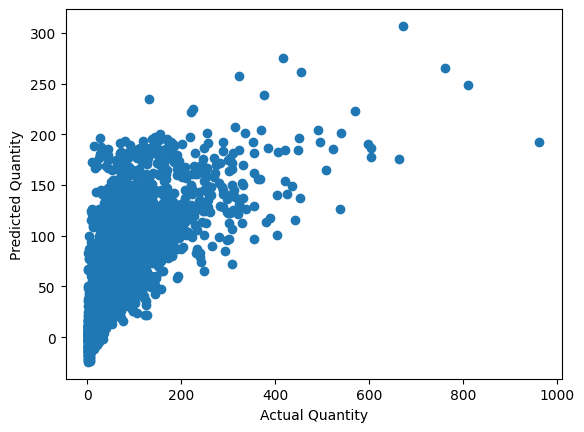

In [62]:
plt.scatter(y_test_prediction_merge['ORDER_Quantity'], y_test_prediction_merge['Predicted Quantity'])
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.show()

In [63]:
mse = mean_squared_error(y_test_prediction_merge['ORDER_Quantity'], y_test_prediction_merge['Predicted Quantity'])
mae = mean_absolute_error(y_test_prediction_merge['ORDER_Quantity'], y_test_prediction_merge['Predicted Quantity'])
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1745.0066895535003
Mean Absolute Error: 22.348228667671837
